In [1]:
%load_ext autoreload
%autoreload 2

from hub.fcn import FCN

path = "../fcn.anec.so"
model = FCN(path=path)

/usr/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


(640, 640, 3)


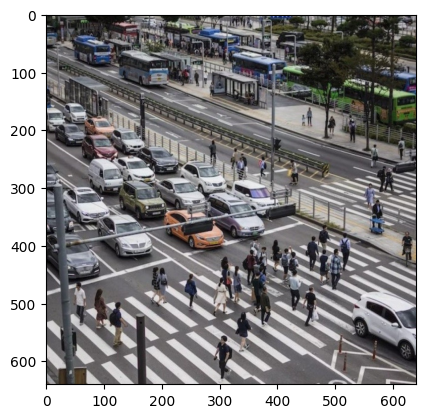

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("data/fcn-input.jpg")[:,:,::-1]
img = cv2.resize(img, (640, 640), interpolation=cv2.INTER_AREA)
print(img.shape)
plt.imshow(img); plt.show()

In [3]:
inarr = model.preprocess(img)
inputs = [inarr]

In [4]:
outputs = model.predict(inputs)


In [5]:
pred = model.postprocess(outputs)
print(pred.shape)

(1, 21, 80, 80)


In [6]:
import torch
import numpy as np

m = torch.nn.Upsample(scale_factor=8, mode='bilinear')
tensor = torch.from_numpy(pred.astype(np.float32))
upscaled = m(tensor).numpy()
print(upscaled.shape)

(1, 21, 640, 640)


In [7]:
mask = upscaled.squeeze().argmax(0)
print(mask.shape)

(640, 640)


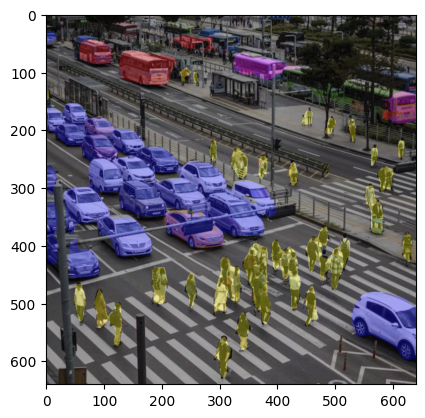

In [8]:
import skimage

canvas = skimage.color.label2rgb(mask, img, saturation=1, alpha=0.29)
canvas = np.round(canvas * 255).astype(np.uint8)
plt.imshow(canvas)
plt.show()

In [9]:
#cv2.imwrite("res/fcn.jpg", canvas[:,:,::-1])